# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

Refer to physical notebook for notes on each line of code

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
#Creating a new data frame 
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I had the most fantastic BA...
1,✅ Trip Verified | Couldn’t book in online. Ar...
2,✅ Trip Verified | London Heathrow to Mumbai in...
3,"✅ Trip Verified | Keflavík, Iceland to London ..."
4,✅ Trip Verified | Terrible Experience with Bri...


In [8]:
df

,reviews
0,✅ Trip Verified | I had the most fantastic BA...
1,✅ Trip Verified | Couldn’t book in online. Ar...
2,✅ Trip Verified | London Heathrow to Mumbai in...
3,"✅ Trip Verified | Keflavík, Iceland to London ..."
4,✅ Trip Verified | Terrible Experience with Bri...
...,...
995,✅ Trip Verified | London to Singapore. It was...
996,Not Verified | Dublin to London. I was trying ...
997,✅ Trip Verified | London - Pisa (Return). I fl...
998,✅ Trip Verified | I was in Prague flying Brit...


In [9]:
#df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Cleaning

Removing symbols, Trip verified, Not Verified and numbers

In [10]:
df["reviews"] = df["reviews"].str.replace(r'✅ Trip Verified \| ' , '').str.replace(r'Not Verified \|  ', '')

C:\Users\eman\AppData\Local\Temp\ipykernel_21448\1317309299.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviews"] = df["reviews"].str.replace(r'✅ Trip Verified \| ' , '').str.replace(r'Not Verified \|  ', '')


In [11]:
df

,reviews
0,I had the most fantastic BA Flight today. The...
1,Couldn’t book in online. Arrived at check in ...
2,London Heathrow to Mumbai in a Boeing 787-8 in...
3,"Keflavík, Iceland to London Heathrow on an A32..."
4,Terrible Experience with British Airways. I bo...
...,...
995,London to Singapore. It was a wonderful fligh...
996,Not Verified | Dublin to London. I was trying ...
997,London - Pisa (Return). I fly this route often...
998,I was in Prague flying British Airways back t...


Removing symbols and numbers, neaten the data

In [12]:
df["reviews"] = df["reviews"].str.replace(r'[^a-zA-Z\s]', '')

C:\Users\eman\AppData\Local\Temp\ipykernel_21448\4109127533.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviews"] = df["reviews"].str.replace(r'[^a-zA-Z\s]', '')


In [13]:
df

,reviews
0,I had the most fantastic BA Flight today The ...
1,Couldnt book in online Arrived at check in to...
2,London Heathrow to Mumbai in a Boeing in Busi...
3,Keflavk Iceland to London Heathrow on an A in ...
4,Terrible Experience with British Airways I boo...
...,...
995,London to Singapore It was a wonderful flight...
996,Not Verified Dublin to London I was trying to...
997,London Pisa Return I fly this route often as ...
998,I was in Prague flying British Airways back t...


## Topic Modelling

In [14]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim import corpora

Technique used to discover topics or themes in a collection of documents
The main goal is to represent each document in the corpus as a mixture of different topics, where each topic is represented by a set of words

1. Data Processing
Text cleaning, tokenisation, and filtering out stop words and irrelevant words 

In this case we will be lowercasing all the words and into indivual words, so they can be treated the same during tokenisation

In [15]:
tokenised_reviews = [review.lower().split() for review in df['reviews']]

2. Building a dictionary
Create a dictionary that maps words to uniwue IDs for efficient processing 

In [16]:
dictionary = corpora.Dictionary(tokenised_reviews)

3. Vectorisation
Convert each document into a numerical vector (e.g Bag of words representation) based on the dictionary 

In [17]:
corpus = [dictionary.doc2bow(review) for review in tokenised_reviews]

4. Building the LDA model 
Applying the LDA alogrithm to the vectorised data to identify topics and their corresponding word distribution 

In [18]:
#setting the number of topics to uncover
num_topics = 20 
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

5. Post-processing
Analyse the output to understand the topics and prevelance in the documents

In [19]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}")
    print(f"Keyword: {topic}\n")

Topic: 0
Keyword: 0.077*"the" + 0.030*"and" + 0.028*"was" + 0.022*"to" + 0.019*"a" + 0.017*"of" + 0.015*"on" + 0.015*"i" + 0.015*"flight" + 0.014*"in"

Topic: 1
Keyword: 0.049*"the" + 0.036*"to" + 0.027*"a" + 0.026*"i" + 0.021*"and" + 0.019*"was" + 0.016*"in" + 0.013*"of" + 0.012*"not" + 0.011*"that"

Topic: 2
Keyword: 0.060*"the" + 0.031*"to" + 0.018*"a" + 0.018*"and" + 0.014*"i" + 0.014*"of" + 0.013*"on" + 0.013*"was" + 0.011*"flight" + 0.010*"my"

Topic: 3
Keyword: 0.050*"the" + 0.038*"to" + 0.025*"and" + 0.025*"a" + 0.020*"we" + 0.016*"flight" + 0.015*"was" + 0.014*"i" + 0.012*"for" + 0.012*"on"

Topic: 4
Keyword: 0.037*"the" + 0.031*"was" + 0.030*"and" + 0.026*"i" + 0.025*"of" + 0.024*"a" + 0.022*"to" + 0.015*"with" + 0.014*"on" + 0.013*"in"

Topic: 5
Keyword: 0.071*"the" + 0.025*"and" + 0.024*"to" + 0.018*"in" + 0.018*"i" + 0.017*"was" + 0.013*"a" + 0.012*"on" + 0.012*"of" + 0.012*"with"

Topic: 6
Keyword: 0.031*"the" + 0.028*"was" + 0.022*"a" + 0.018*"i" + 0.016*"and" + 0.015*"t

## Sentiment Analysis

In NLP, sentiment analysis is the process to determining the sentiment expressed in apiece of text
We will be using VADAR which is a form of sentiment analysis tool designed for analysing reviews
It assigns a valence score to positive, negative, neutral reviews.

In [20]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
#Applying the sentiment analysis using VADAR

def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)
    
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [23]:
# Accesing the reviews column in the df, and applying the get_sentiment text
# Creating a new coulm called sentiment in the df
df['sentiment'] = df['reviews'].apply(get_sentiment)


In [30]:
#Creating a new variable called sentiment_count
#Using the df sentiment 
#Applying the pandas function to count the unique occurance in the sentiment columnn
sentiment_counts = df['sentiment'].value_counts()

## Word Cloud

Installing and Importing the appropriate libraries 

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

NameError: name 'wordclouds' is not defined

In [35]:
grouped_reviews = df.groupby('sentiment')['reviews'].apply(' '.join)

In [36]:
#Generate word clouds for each sentiment catagory
wordclouds = {sentiment: WordCloud(width=800, height=400, background_color='white').generate(text)
              for sentiment, text in grouped_reviews.items()}

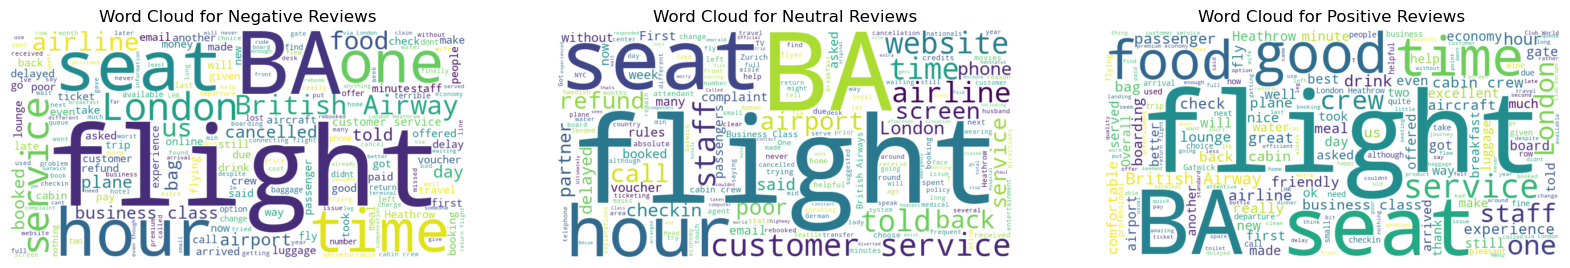

In [40]:
plt.figure(figsize=(20, 10))
for i, (sentiment, wordcloud) in enumerate(wordclouds.items()):
    plt.subplot(1, len(wordclouds), i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment.capitalize()} Reviews")

## Data Visualisation 

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

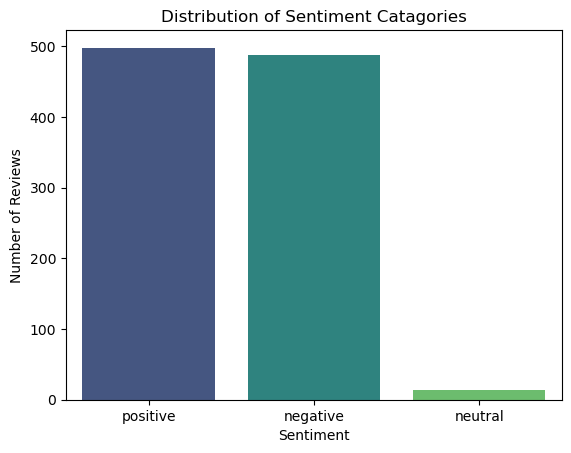

In [44]:
sns.barplot(x = sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Catagories')
plt.show()